# Getting Started

The simplest tasks are `pypolycontain` is defining polytopic objects, performing operations, and visualizing them. First,  import the package alongside `numpy`.

In [1]:
import numpy as np
import pypolycontain as pp

## Objects
### H-polytope
We define an H-polytope $\mathbb{P}=\{x \in \mathbb{R}^2 | Hx \le h\}$. We give the following numericals for H and h:
$$
H=\left( \begin{array}{cc} 1 & 1 \\ -1 & 1 \\ 0 & -1 \end{array}\right),
h= \left( \begin{array}{c} 1 \\ 1 \\ 0 \end{array}\right).
$$

In [2]:
H=np.array([[1,1],[-1,1],[0,-1]])
h=np.array([[1,1,0]]).reshape(3,1)
my_triangle=pp.H_polytope(H,h)

This a triangle as it is defined by intersection of 3 half-spaces in $\mathbb{R}^2$. In order to visualizate the polytope, we call the following function. Note the brackets around `visualize` function - it takes in a list of polytopes as its primary argument.

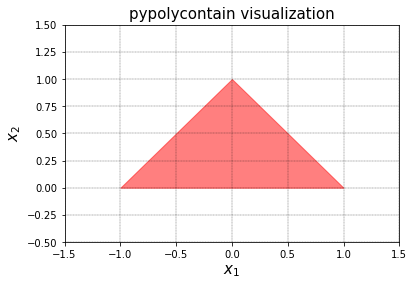

In [3]:
pp.visualize([my_triangle])

### AH-polytope
We define an AH-polytope as $t+T\mathbb{P}$ with the following numbers. The transformation represents a rotation of $30^\circ$ and translation in $x$ direction.

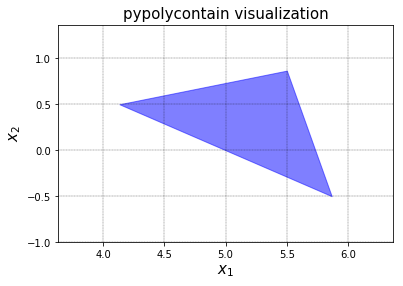

In [4]:
t=np.array([5,0]).reshape(2,1) # offset
theta=np.pi/6 # 30 degrees
T=np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]]) # Linear transformation
my_AH_polytope=pp.AH_polytope(t,T,my_triangle)
pp.visualize([my_AH_polytope])

### Zonotope
We define a zonotope as $\mathbb{Z}=x+G[-1,1]^{n_p}$, where $n_p$ is the number of rows in $p$. 

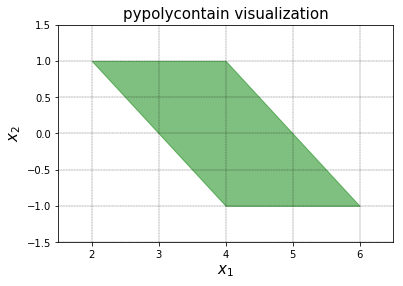

In [5]:
x=np.array([4,0]).reshape(2,1) # offset
G=np.array([[1,0,1],[0,0,-1]]).reshape(2,3)
my_zonotope=pp.zonotope(x,G)
pp.visualize([my_zonotope])

## Visualization
The `visualize` function allows for visualizing multiple polytopic objects. The default colors for ```H_polytope```, ```zonotope```, and ```AH_polytope``` are red, green, and blue, respectively.

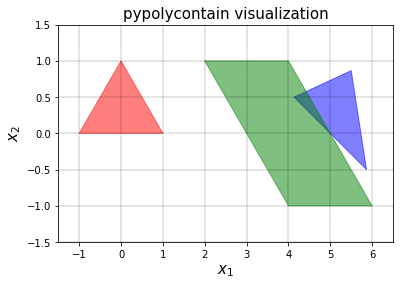

In [6]:
pp.visualize([my_triangle,my_AH_polytope,my_zonotope])

You may have noticed the colors. Here are the default colors for various polytopic objects. Using color argument you can change the color.

| Object      | Default Color |
|:-----------:|:-----:|
    | H-polytope  | Red   |
| Zonotope    | Green |
| AH-polytope | Blue  |

### Options
`visualize` has a set of options. While it only supports 2D plotting, it can take high dimensional polytopes alongside the argument `list_of_dimensions`. Its ```default``` is `[0,1]`, meaning the projection into the first and second axis is demonstrated. 

You can also add a separate `subplot` environment to plot the polytopes. Take the following example:

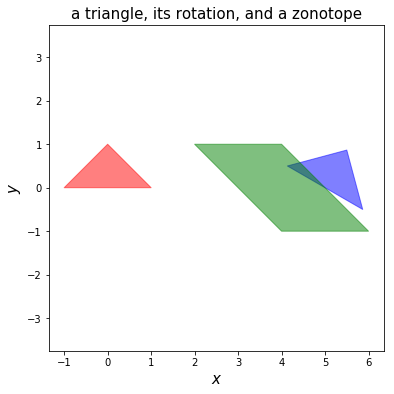

In [7]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
fig.set_size_inches(6, 6)
pp.visualize([my_triangle,my_AH_polytope,my_zonotope],ax=ax)
ax.set_title(r'a triangle, its rotation, and a zonotope',FontSize=15)
ax.set_xlabel(r'$x$',FontSize=15)
ax.set_ylabel(r'$y$',FontSize=15)
ax.axis('equal')
ax.grid('off')

## Operations
`pypolycontain` supports a broad range of polytopic operations. The complete list of operations is [here](https://pypolycontain.readthedocs.io/en/latest/operations.html).

### Minkowski sum

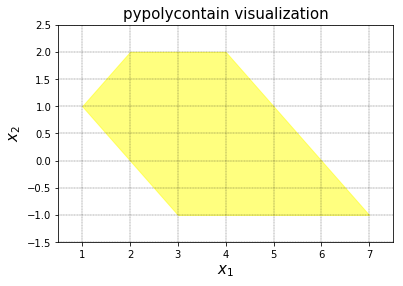

In [8]:
sum_polytope=pp.operations.minkowski_sum(my_triangle,my_zonotope)
sum_polytope.color='yellow'
pp.visualize([sum_polytope])

### Intersection
Let's take the intersection of `my_AH_polytope` and `sum_polytope`.

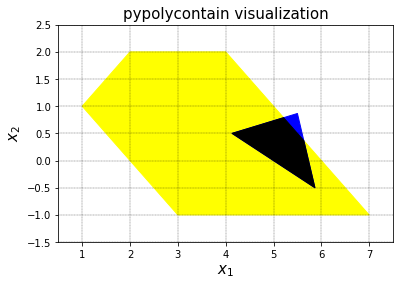

In [9]:
my_intersection=pp.intersection(my_AH_polytope,sum_polytope)
my_intersection.color='black'
pp.visualize([sum_polytope,my_AH_polytope,my_intersection],alpha=1)

### Bounding Box
We can compute the bounding box of a polytopic object. For instance, let's compute the bounding box of `sum_polytope`.

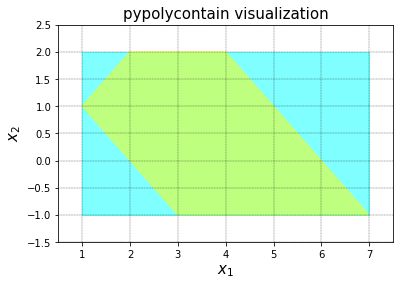

In [10]:
my_box=pp.bounding_box(sum_polytope)
pp.visualize([my_box,sum_polytope])

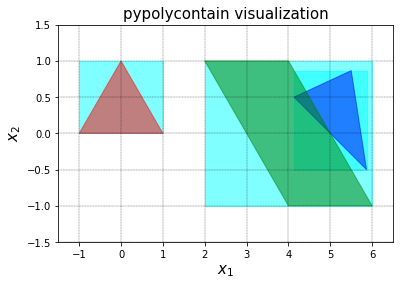

In [11]:
mylist=[my_triangle,my_AH_polytope,my_zonotope]
pp.visualize([pp.operations.bounding_box(p) for p in mylist]+mylist)